# Apply KNN using sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X=data.iloc[:,2:4].values

In [4]:
X.shape

(400, 2)

In [5]:
y=data.iloc[:,-1].values

In [6]:
y.shape

(400,)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [8]:
print(X_train.shape)
print(X_test.shape)

(320, 2)
(80, 2)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.54422122,  1.37055795],
       [-0.25872812,  0.78335947],
       [-0.16356376, -0.30295772],
       [ 0.78807991, -0.86079627],
       [-1.21037179, -1.09567566],
       [-0.25872812, -0.7727165 ],
       [-1.30553616, -1.3892749 ],
       [ 0.69291554, -1.41863482],
       [ 0.12192934, -0.83143635],
       [ 0.69291554, -1.30119513],
       [-1.11520742, -0.53783711],
       [ 2.12038105,  1.10631863],
       [ 1.83488795, -1.30119513],
       [-0.25872812, -0.1561581 ],
       [-0.25872812, -1.27183521],
       [-0.73454996,  0.25488084],
       [ 0.97840865,  1.98711635],
       [-1.78135799, -1.33055505],
       [-1.78135799, -0.00935848],
       [ 0.88324428, -0.59655695],
       [ 1.45423048,  2.13391597],
       [ 0.40742244,  0.13744114],
       [-0.25872812, -0.30295772],
       [ 0.21709371, -0.33231764],
       [-0.25872812,  0.0787213 ],
       [-0.06839939, -0.50847718],
       [-0.73454996,  1.07695871],
       [ 0.12192934,  0.25488084],
       [-0.35389249,

In [10]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.16873738,  0.51912016],
       [-0.44905686, -1.24247528],
       [-0.92487869,  0.54848008],
       [ 1.73972358, -0.30295772],
       [-1.40070052, -0.12679817],
       [ 0.02676498, -0.1561581 ],
       [ 0.21709371, -0.1561581 ],
       [ 0.97840865, -1.03695581],
       [-0.92487869,  0.48976023],
       [ 0.97840865, -0.86079627],
       [-0.54422122,  0.46040031],
       [ 0.12192934,  0.0787213 ],
       [ 0.97840865, -1.18375543],
       [-1.68619362, -1.00759589],
       [-0.06839939, -0.24423787],
       [-0.06839939,  2.1632759 ],
       [ 1.83488795, -1.09567566],
       [ 0.97840865,  0.75399955],
       [ 0.12192934, -0.33231764],
       [ 0.40742244, -0.1561581 ],
       [-1.11520742, -1.59479437],
       [ 1.07357301, -1.24247528],
       [ 1.64455921,  1.60543734],
       [ 1.35906611, -1.44799475],
       [ 0.78807991,  0.25488084],
       [-1.68619362, -0.62591688],
       [ 0.21709371,  0.02000145],
       [ 0.78807991,  0.10808122],
       [ 0.78807991,

### Method-1 to find value of K

In [11]:
np.sqrt(X_train.shape[0])

17.88854381999832

In [12]:
k=17
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [13]:
# Train our model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [14]:
y_pred=knn.predict(X_test)
y_pred.shape

(80,)

In [15]:
y_test.shape

(80,)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.925

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[48,  2],
       [ 4, 26]], dtype=int64)

### Method-2 to find value of K

In [18]:
# Effect of K on Training Error rate and Validation Error rate

error_train=[]
error_test=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    x=confusion_matrix(y_train,knn.predict(X_train))
    y=confusion_matrix(y_test,knn.predict(X_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())

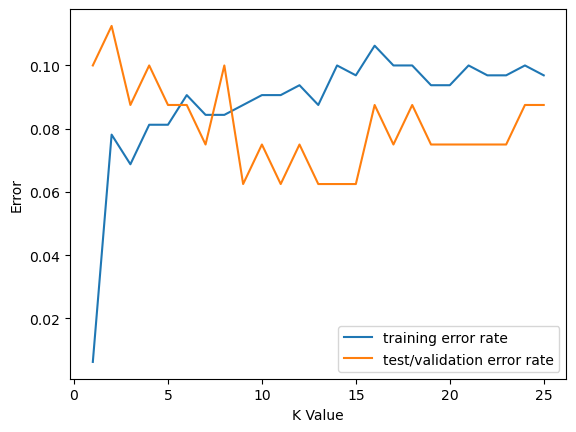

In [19]:
plt.plot(range(1,26),error_train,label='training error rate')
plt.plot(range(1,26),error_test,label='test/validation error rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()

In [20]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [21]:
y_pred=knn.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

0.9375

# Apply KNN using user defined function

In [23]:
def predict_output():
    age=int(input("Enter the age"))
    salary=int(input("Enter the salary"))
    
    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new)
    
    if knn.predict(X_new)[0]==0:
        return "Will not purchase"
    else:
        return "Will purchase"

In [24]:
predict_output()

Enter the age20
Enter the salary20000


'Will not purchase'